In [5]:
!conda install pytorch torchvision torchaudio -c pytorch-nightly -y

Channels:
 - pytorch-nightly
 - defaults
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - pytorch
    - torchaudio
    - torchvision


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    libjpeg-turbo-2.0.0        |       h1a28f6b_0         386 KB
    libwebp-1.3.2              |       ha3663a8_0          86 KB
    pytorch-2.6.0.dev20241112  |         py3.12_0        60.0 MB  pytorch-nightly
    torchaudio-2.5.0.dev20241118|        py312_cpu         4.9 MB  pytorch-nightly
    torchvision-0.20.0.dev20241118|        py312_cpu         7.0 MB  pytorch-nightly
    ------------------------------------------------------------
                                           Total:        72.4 MB

The following NEW packages will be INSTALLED:

  libjpeg-turbo      pkgs/main/osx-arm64::libjpeg-turbo-2.0.0-h1a28f6b_0 


In [185]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)

2.6.0.dev20241112


In [187]:
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    print (x)
else:
    print ("MPS device not found.")

tensor([1.], device='mps:0')


## Scalar | Vector | Tensor

In [190]:
#Scalar
scalar = torch.tensor(7)
scalar

tensor(7)

In [192]:
scalar.ndim

0

In [194]:
scalar.item()

7

In [196]:
#Vector
vector = torch.tensor([7, 7])
vector

tensor([7, 7])

In [198]:
vector.ndim

1

In [200]:
vector.shape

torch.Size([2])

In [202]:
#Matrix
MATRIX = torch.tensor([[7, 8],
                       [9, 10]])
MATRIX

tensor([[ 7,  8],
        [ 9, 10]])

In [204]:
MATRIX.ndim

2

In [206]:
MATRIX[1]

tensor([ 9, 10])

In [208]:
MATRIX.shape

torch.Size([2, 2])

In [210]:
#Tensor
TENSOR = torch.tensor([[[1,2,3],[4,5,6], [7,8,9]]])
TENSOR

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])

In [212]:
TENSOR.ndim

3

In [214]:
TENSOR.shape

torch.Size([1, 3, 3])

## Random Tensors

In [217]:
random_tensor = torch.rand(3, 4)
random_tensor

tensor([[0.7936, 0.3407, 0.1374, 0.0061],
        [0.6444, 0.7230, 0.8844, 0.3629],
        [0.0813, 0.9026, 0.4589, 0.6702]])

In [219]:
random_image_size_tensor = torch.rand(size=(3, 224, 224))
random_image_size_tensor.shape, random_image_size_tensor.ndim

(torch.Size([3, 224, 224]), 3)

In [221]:
# Zeros and Ones
zeros = torch.zeros(3,4)
zeros

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [223]:
ones = torch.ones(3,4)
ones

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [225]:
ones.dtype

torch.float32

In [227]:
torch.arange(start=1,end=1000,step=50)

tensor([  1,  51, 101, 151, 201, 251, 301, 351, 401, 451, 501, 551, 601, 651,
        701, 751, 801, 851, 901, 951])

In [229]:
float_32_tensor = torch.tensor([3,6,9], dtype=None, device=None, requires_grad=False)
float_32_tensor

tensor([3, 6, 9])

In [231]:
float_32_tensor.dtype

torch.int64

In [233]:
float_32_tensor*float_32_tensor

tensor([ 9, 36, 81])

In [235]:
some_tensor = torch.rand(3,4)
some_tensor

tensor([[0.3658, 0.7063, 0.7536, 0.3746],
        [0.9741, 0.3239, 0.9929, 0.8266],
        [0.2936, 0.1113, 0.9666, 0.9590]])

In [237]:
print(some_tensor)
print(f"Datatype of tensor : {some_tensor.dtype}")
print(f"Shape of tensor : {some_tensor.size()}")
print(f"Device tensor is on : {some_tensor.device}")

tensor([[0.3658, 0.7063, 0.7536, 0.3746],
        [0.9741, 0.3239, 0.9929, 0.8266],
        [0.2936, 0.1113, 0.9666, 0.9590]])
Datatype of tensor : torch.float32
Shape of tensor : torch.Size([3, 4])
Device tensor is on : cpu


## Manipulation Tensor

In [240]:
tensor = torch.tensor([1, 2, 3])
tensor + 10

tensor([11, 12, 13])

In [242]:
tensor * 10

tensor([10, 20, 30])

In [244]:
tensor - 1

tensor([0, 1, 2])

In [246]:
torch.mul(tensor, 10)

tensor([10, 20, 30])

In [248]:
torch.add(tensor, 10)

tensor([11, 12, 13])

### Matrix Multiplication

In [251]:
# Element wise
tensor * tensor

tensor([1, 4, 9])

In [253]:
torch.matmul(tensor,tensor)

tensor(14)

In [255]:
ele1 = torch.rand(3,3)
ele2 = torch.rand(3,3)
ele1, ele2

(tensor([[0.5856, 0.6208, 0.5260],
         [0.6534, 0.3648, 0.4439],
         [0.3303, 0.2824, 0.8368]]),
 tensor([[0.4687, 0.2097, 0.1181],
         [0.3855, 0.8595, 0.9353],
         [0.5078, 0.5033, 0.4037]]))

In [257]:
torch.matmul(ele1,ele2)

tensor([[0.7809, 0.9211, 0.8621],
        [0.6723, 0.6740, 0.5976],
        [0.6886, 0.7332, 0.6409]])

In [259]:
value = 0
for i in range(len(tensor)):
    value += tensor[i] * tensor[i]
print(value)

tensor(14)


In [261]:
torch.matmul(tensor,tensor)

tensor(14)

In [263]:
tensor @ tensor

tensor(14)

In [266]:
tensoe_A = torch.tensor([[1,2],[3,4],[5,6]])
tensoe_B = torch.tensor([[7,10], [8, 11], [9, 12]])

In [270]:
tensoe_B.T @ tensoe_B

tensor([[194, 266],
        [266, 365]])

### Tensor Aggregation

In [276]:
x = torch.arange(0, 100, 10)
x

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [280]:
torch.min(x), x.min()

(tensor(0), tensor(0))

In [282]:
torch.max(x), x.max()

(tensor(90), tensor(90))

In [288]:
torch.mean(x.type(torch.float32)), x.type(torch.float32).mean()

(tensor(45.), tensor(45.))

In [290]:
torch.sum(x), x.sum()

(tensor(450), tensor(450))

### Positional min and max

In [293]:
x

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [295]:
x.argmin()

tensor(0)

In [297]:
x.argmax()

tensor(9)

### Reshaping stacking sueezing and un squeezing tensor

In [318]:
x = torch.arange(1,10)
x, x.shape

(tensor([1, 2, 3, 4, 5, 6, 7, 8, 9]), torch.Size([9]))

In [320]:
x_reshaped = x.reshape(3,3)
x_reshaped, x_reshaped.shape

(tensor([[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]),
 torch.Size([3, 3]))

In [322]:
z = x.view(3,3)
z, z.shape

(tensor([[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]),
 torch.Size([3, 3]))

In [324]:
z[1, 1] = 10
z, x

(tensor([[ 1,  2,  3],
         [ 4, 10,  6],
         [ 7,  8,  9]]),
 tensor([ 1,  2,  3,  4, 10,  6,  7,  8,  9]))

In [338]:
x_stack = torch.stack([x,x,x,x], dim=0)
x_stack

tensor([[ 1,  2,  3,  4, 10,  6,  7,  8,  9],
        [ 1,  2,  3,  4, 10,  6,  7,  8,  9],
        [ 1,  2,  3,  4, 10,  6,  7,  8,  9],
        [ 1,  2,  3,  4, 10,  6,  7,  8,  9]])

In [344]:
x_original = torch.rand(size = (224,224,3))
x_permuted = x_original.permute(2, 0, 1)
x_original.shape, x_permuted.shape

(torch.Size([224, 224, 3]), torch.Size([3, 224, 224]))

In [346]:
z

tensor([[ 1,  2,  3],
        [ 4, 10,  6],
        [ 7,  8,  9]])

In [348]:
z[:,0]

tensor([1, 4, 7])

In [360]:
z[:,1]

tensor([ 2, 10,  8])

In [362]:
import numpy as np
array = np.arange(1.0, 8.0)
tensor = torch.from_numpy(array)
array, tensor

(array([1., 2., 3., 4., 5., 6., 7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

### Nural Networks

In [365]:
from torch import nn
import matplotlib.pyplot as plt


In [367]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [369]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing 
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [371]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

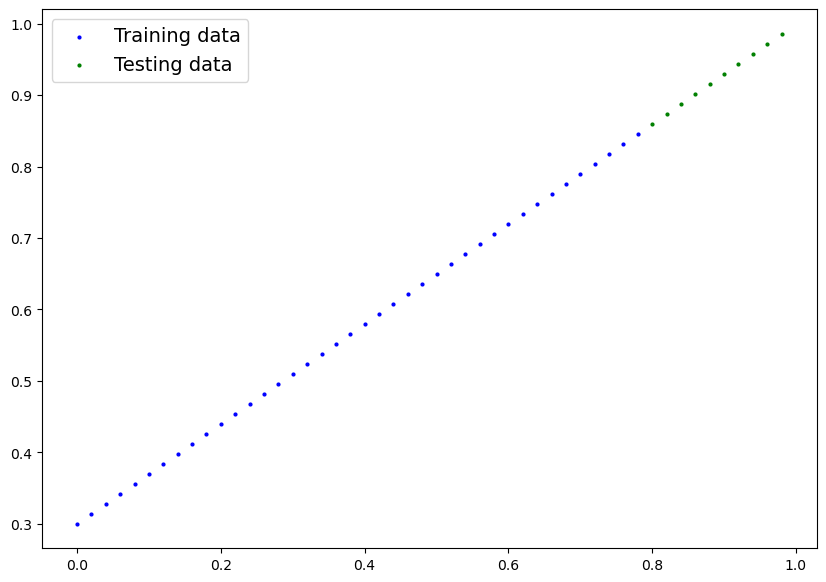

In [373]:
plot_predictions();

In [375]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__() 
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)